/var/folders/c1/0skxdwdx0zdcpl8hlxr2xcz40000gn/T/ipykernel_12409/1870086190.py:21: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(


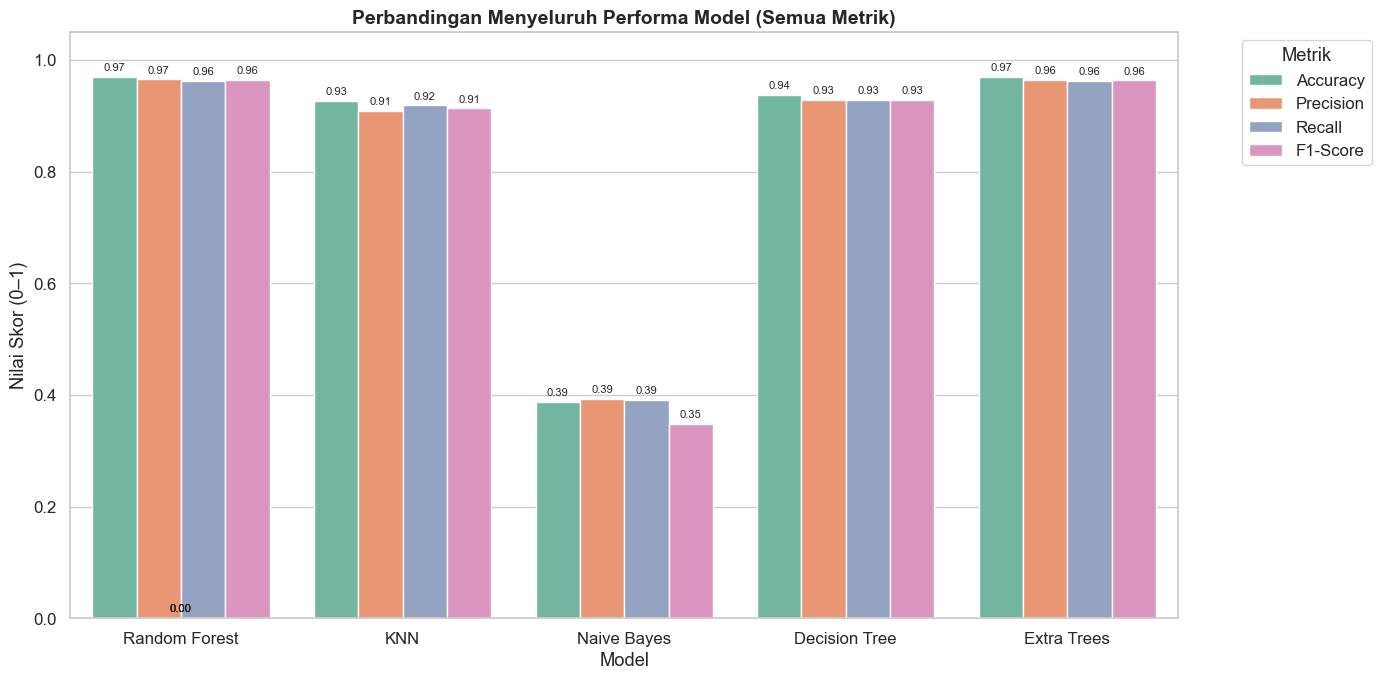

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# 1️⃣ Baca data CSV
df = pd.read_csv("hasil_model.csv")  # ganti dengan nama file kamu

# 2️⃣ Ubah format agar bisa diplot dalam satu grafik
df_melt = df.melt(
    id_vars=["Percobaan", "Model"],
    value_vars=["Accuracy", "Precision", "Recall", "F1-Score"],
    var_name="Metrik",
    value_name="Skor"
)

# 3️⃣ Atur gaya visual
sns.set(style="whitegrid", font_scale=1.1)

# 4️⃣ Buat grafik utama
plt.figure(figsize=(14, 7))
sns.barplot(
    data=df_melt,
    x="Model",
    y="Skor",
    hue="Metrik",
    palette="Set2",
    ci=None
)

# 5️⃣ Tambahkan angka di atas setiap batang
for p in plt.gca().patches:
    plt.gca().annotate(
        f"{p.get_height():.2f}",
        (p.get_x() + p.get_width() / 2., p.get_height()),
        ha='center', va='bottom',
        fontsize=8,
        xytext=(0, 3),
        textcoords='offset points'
    )

# 6️⃣ Label dan tampilan
plt.title("Perbandingan Menyeluruh Performa Model (Semua Metrik)", fontsize=14, fontweight='bold')
plt.ylabel("Nilai Skor (0–1)")
plt.xlabel("Model")
plt.ylim(0, 1.05)
plt.legend(title="Metrik", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


/var/folders/c1/0skxdwdx0zdcpl8hlxr2xcz40000gn/T/ipykernel_12409/323590220.py:32: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(


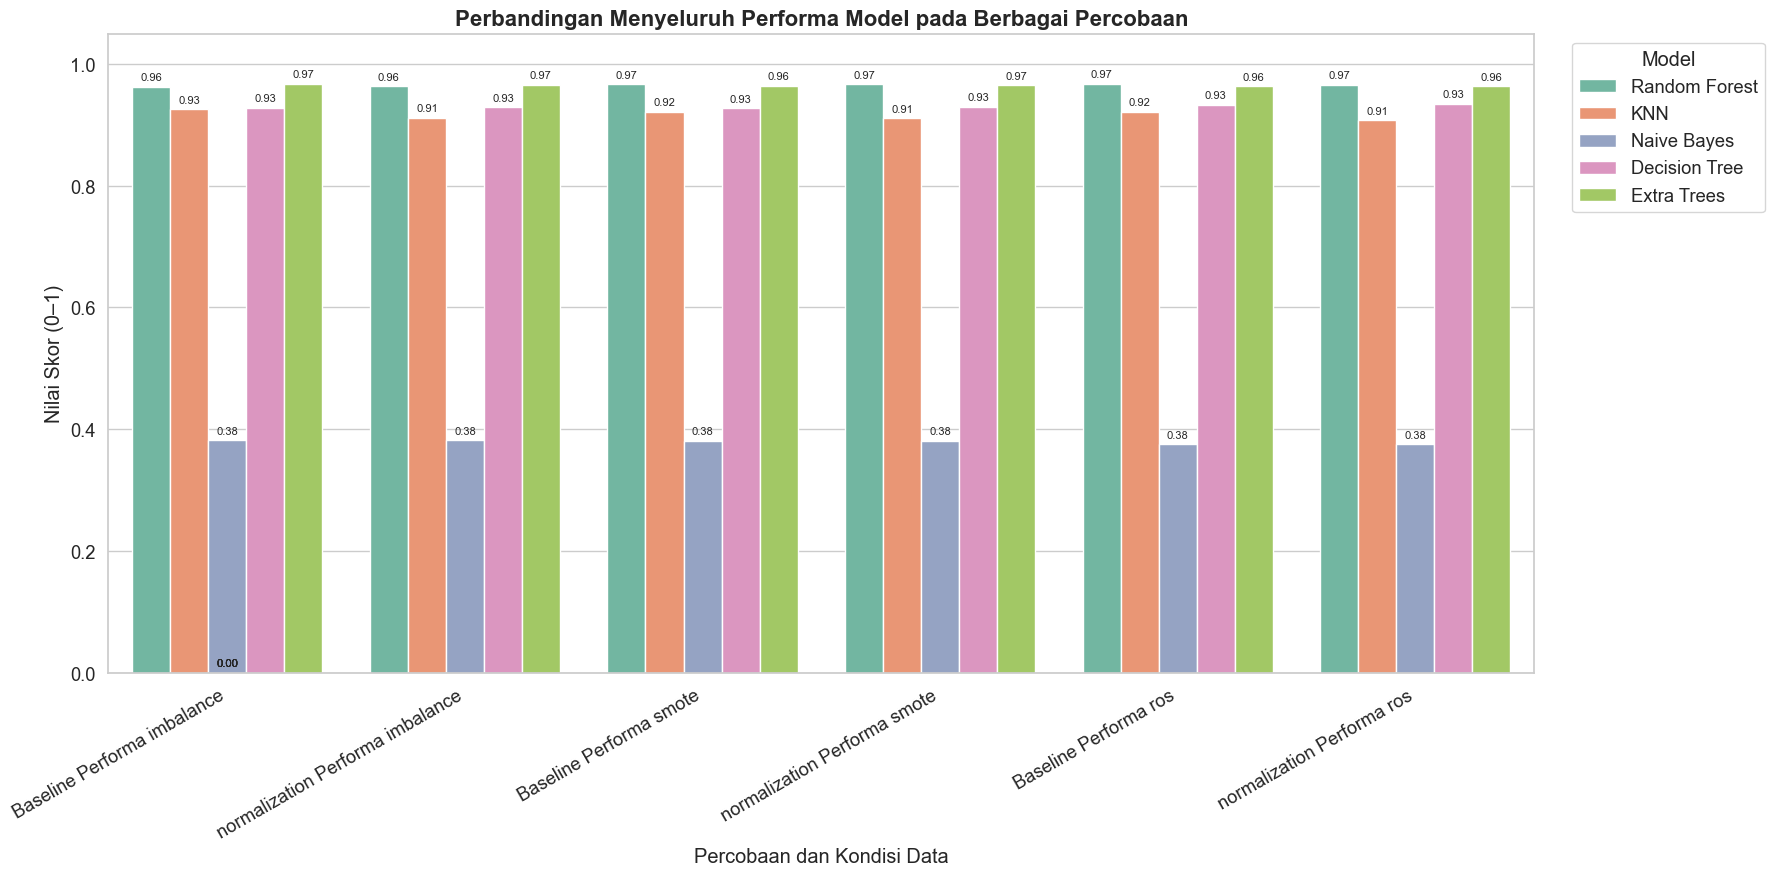

In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# === 1️⃣ Baca data ===
df = pd.read_csv("hasil_model.csv")  # ganti sesuai nama file CSV kamu

# === 2️⃣ Ubah ke format long agar mudah diplot ===
df_melt = df.melt(
    id_vars=["Percobaan", "Model"],
    value_vars=["Accuracy", "Precision", "Recall", "F1-Score"],
    var_name="Metrik",
    value_name="Skor"
)

# === 3️⃣ Atur urutan tampilan biar konsisten ===
order_percobaan = [
    "Baseline Performa imbalance",
    "normalization Performa imbalance",
    "Baseline Performa smote",
    "normalization Performa smote",
    "Baseline Performa ros",
    "normalization Performa ros"
]
df_melt["Percobaan"] = pd.Categorical(df_melt["Percobaan"], categories=order_percobaan, ordered=True)

# === 4️⃣ Buat figure besar ===
sns.set(style="whitegrid", font_scale=1.2)
plt.figure(figsize=(18, 9))

# === 5️⃣ Plot grouped bar chart ===
sns.barplot(
    data=df_melt,
    x="Percobaan",
    y="Skor",
    hue="Model",
    palette="Set2",
    ci=None
)

# === 6️⃣ Tambahkan anotasi angka di atas setiap batang ===
for p in plt.gca().patches:
    plt.gca().annotate(
        f"{p.get_height():.2f}",
        (p.get_x() + p.get_width() / 2., p.get_height()),
        ha='center', va='bottom',
        fontsize=8,
        xytext=(0, 3),
        textcoords='offset points'
    )

# === 7️⃣ Label dan tampilan ===
plt.title("Perbandingan Menyeluruh Performa Model pada Berbagai Percobaan", fontsize=16, fontweight='bold')
plt.ylabel("Nilai Skor (0–1)")
plt.xlabel("Percobaan dan Kondisi Data")
plt.xticks(rotation=30, ha="right")
plt.ylim(0, 1.05)
plt.legend(title="Model", bbox_to_anchor=(1.02, 1), loc='upper left')
plt.tight_layout()
plt.show()
